In [1]:
import numpy as np
from run_length import *

# Testing

In [2]:
test = np.array([[16,16,3,3],
                    [16,16,3,0],
                    [16,3,0,0],
                    [16,0,0,0]])

matrix = np.array([[-16,  -16,  16,  16,  24,  -40,  51,  0], 
                    [-16,  16,  16,  19,  26,  -58,  0,  0],
                    [16,  16,  16,  24,  40,  -57,  0,  0], 
                    [14,  17,  22,  29,  51,  0,  0,  0], 
                    [18,  22,  37,  56,  68, 0, 0,  0], 
                    [24,  35,  0,  0,  0, 0, 0,  0], 
                    [49,  64,  0,  0, 0, 0, 0, 0], 
                    [72,  92,  0,  0, 0, 0, 0,  0]])

In [ ]:
result = zigzag_iteration(matrix)
print(result)

In [ ]:
run_length_code_binary = run_length_coding_binary(result)
print(run_length_code_binary)

In [ ]:
bit_sequence = get_bit_sequence(run_length_code_binary)
print(bit_sequence)

In [ ]:
result = decode_run_length(bit_sequence)
print(result)

In [ ]:
decoded = np.array(recreate_matrix_from_zigzag(result, 8, 8))
print(decoded)

In [ ]:
print(matrix)

In [ ]:
bit_s = compress_image(matrix)
decoded = decompress_bit_sequence(bit_s)
print(decoded)

# Compressing and decomspressing blocks

In [3]:
import cv2
image_array = cv2.resize(cv2.imread("D:\sem_7\Image_and_video_coding\Video_codec\\video-codec\Pattern.jpg",0), (640, 640))
blocks = get_blocks(image_array)

640 640
0 0


In [4]:
dct_blocks = get_dct_blocks(blocks)

In [25]:
high_quntized_blocks = quantize_blocks(dct_blocks,"high")

In [6]:
high_quntized_blocks = (high_quntized_blocks/8).astype(int)

In [ ]:
print(high_quntized_blocks.shape)

In [26]:
result_string = compress_run_length_blocks(high_quntized_blocks,"run_length.txt")

In [27]:
print(len(result_string))

3510717


In [28]:
file_size = (len(result_string)/8000)
previos_file_size = (640*640*8)/8000
print(f"Compressed file size - {file_size} kb")
print(f"Previous file size - {previos_file_size} kb")

Compressed file size - 438.839625 kb
Previous file size - 409.6 kb


In [8]:
result_blocks = decompress_run_length_blocks("run_length.txt")

In [ ]:
print(result_blocks.shape)

In [ ]:
print(np.max((high_quntized_blocks/8).astype(int)))

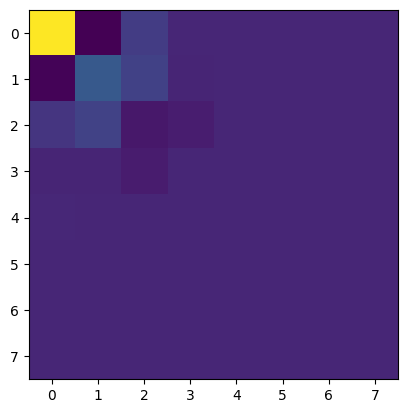

In [11]:
import matplotlib.pyplot as plt
plt.imshow(result_blocks[100])

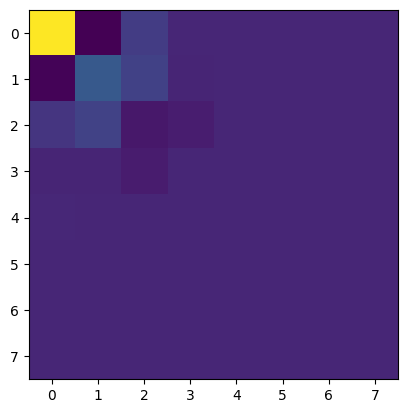

In [12]:
plt.imshow(high_quntized_blocks[100])